# 월별 사고건수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_all = pd.DataFrame()
for i in range(18, 22, 1):
    df_file = pd.read_csv(f'./data/월별 교통사고(20{i}).csv', encoding='euc-kr')
    df_all = pd.concat([df_all,df_file], axis=0)
df_all = df_all[['Unnamed: 1']]
df_all = df_all.reset_index(drop=True)
df_all = df_all.dropna()
df_all = df_all.drop(1)
df_all = df_all.drop(15)
df_all = df_all.drop(29)
df_all = df_all.drop(43)
# df_all.index = ['2018.01','2018.02','2018.03','2018.04','2018.05','2018.06','2018.07','2018.08','2018.09','2018.10','2018.11','2018.12','2019.01','2019.02','2019.03','2019.04','2019.05','2019.06','2019.07','2019.08','2019.09','2019.10','2019.11','2019.12','2020.01','2020.02','2020.03','2020.04','2020.05','2020.06','2020.07','2020.08','2020.09','2020.10','2020.11','2020.12','2021.01','2021.02','2021.03','2021.04','2021.05','2021.06','2021.07','2021.08','2021.09','2021.10','2021.11','2021.12']
# df_all.index.astype(str)
df_all = df_all.reset_index(drop=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 1  48 non-null     object
dtypes: object(1)
memory usage: 512.0+ bytes


# 월별 이륜차 사고건수

In [15]:
df = pd.read_csv('./data/가해자_차종별_교통사고_20220726173801.csv', encoding='euc-kr')
df = df[['월별(1)','2018','2019','2020','2021']]
df
df.to_csv('./data_2/월별이륜차사고건수.csv')

In [4]:
df_1 = df[['월별(1)', '2018']]
df_2 = df[['월별(1)', '2019']]
df_3 = df[['월별(1)', '2020']]
df_4 = df[['월별(1)', '2021']]

In [5]:
df_1.columns=['월','사고건수']
df_2.columns=['월','사고건수']
df_3.columns=['월','사고건수']
df_4.columns=['월','사고건수']

In [6]:
df = pd.concat([df_1,df_2,df_3,df_4],axis=0)
df = df.drop(0).reset_index(drop=True)
df = df.drop(0)
df = df.drop(13)
df = df.drop(26)
df = df.drop(39)
df['사고건수'] = df['사고건수'].astype(int)
df = df[['사고건수']]
df = df.reset_index(drop=True)

In [7]:
df_final = pd.concat([df_all,df], axis=1)
df_final.columns=['전체사고건수','사고건수']
df_final = df_final.astype(int)
df_final['사고율'] = df_final['사고건수'] / df_final['전체사고건수'] * 100
df_final
df = df_final[['사고율']]
df_final.head()

,전체사고건수,사고건수,사고율
0,17026,879,5.162692
1,16208,864,5.330701
2,17022,1168,6.861708
3,17992,1269,7.053135
4,18636,1310,7.029405


In [8]:
df.to_csv('./data/이륜차사고율.csv')

In [9]:
df_graph = df
#df_graph.index = ['2018.01','2018.02','2018.03','2018.04','2018.05','2018.06','2018.07','2018.08','2018.09','2018.10','2018.11','2018.12','2019.01','2019.02','2019.03','2019.04','2019.05','2019.06','2019.07','2019.08','2019.09','2019.10','2019.11','2019.12','2020.01','2020.02','2020.03','2020.04','2020.05','2020.06','2020.07','2020.08','2020.09','2020.10','2020.11','2020.12','2021.01','2021.02','2021.03','2021.04','2021.05','2021.06','2021.07','2021.08','2021.09','2021.10','2021.11','2021.12']
df_graph.head(1)

,사고율
0,5.162692


Text(0, 0.5, '사고율')

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47452 (\N{HANGUL SYLLABLE RYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\

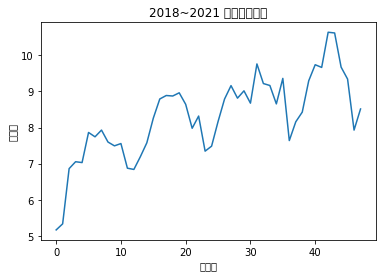

In [10]:
plt.plot(df_graph)
plt.title('2018~2021 이륜차사고율')
plt.xlabel('연도별')
plt.ylabel('사고율')

# 월별 온라인매출액

In [11]:
df_2 = pd.read_csv('./data/온라인쇼핑몰_판매매체별_상품군별거래액_20220726151517.csv', encoding='euc-kr')
df_2 = df_2.T
df_2 = df_2[[2]]
df_2 = df_2.drop('상품군별')
df_2 = df_2.drop('판매매체별')
df_2 = df_2.reset_index(drop=True)
df_2.columns=['온라인판매량']
df_2.to_csv('./data/온라인판매량.csv')

In [12]:
df_3 = pd.read_csv('./data/온라인쇼핑몰_판매매체별_상품군별거래액_20220726151517.csv', encoding='euc-kr')
df_3 = df_3.T
df_3 = df_3[[2]]
df_3 = df_3.drop('상품군별')
df_3 = df_3.drop('판매매체별')
df_3.columns=['온라인판매량']
df_3.head()

,온라인판매량
2018.01,309665
2018.02,288800
2018.03,325867
2018.04,318369
2018.05,355920


In [13]:
df_total = pd.concat([df, df_2], axis=1)
df_total.columns = ['사고율','온라인매출액']
df_total.head()
df_total['온라인매출액'] = df_total['온라인매출액'].astype(int)

NameError: name 'sns' is not defined

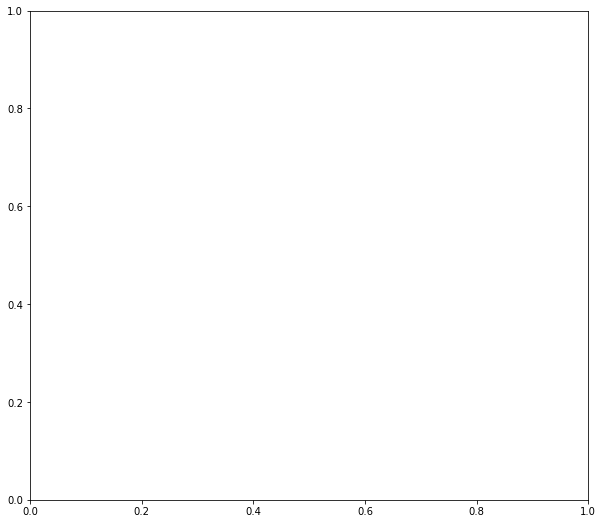

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,9))

mask = np.zeros_like(df_total.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_total.corr(), annot=True, cmap='RdPu', linewidth=0.1, mask=mask)
plt.show()

In [ ]:
plt.plot(df_total['온라인매출액'])
plt.title('2018~2021 온라인 매출액 현황')
plt.xlabel('연도별')
plt.ylabel('온라인매출액')

In [ ]:
df_total['온라인매출액'].astype(int)

In [ ]:
### 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

### 데이터 생성하기

x = np.array(df_total['온라인매출액'])
y = np.array(df_total['사고율'])

# 산점도 시각화
plt.scatter(x, y) 
plt.show()

### 산점도가 직선을 띄지않고 곡선을 띄고 있다.

### 독립변수(x) 데이터를 메트릭스 형태로 변형하기
#    - 향후 다항회귀로 변환시 차원 확대를 위해서..

from sklearn.linear_model import LinearRegression

# np.newaxis : 입력을 matrix로 변환
x = x[:, np.newaxis] 
print("x = \n", x)
print("-------------------------------")


### 선형회귀 모델 생성하기

# 선형회귀 학습모델 생성하기
model = LinearRegression().fit(x, y) 

# 예측(테스트) 하기
y_pred = model.predict(x)
print("예측(테스트) 결과 = ", y_pred)
# [2.  2.7 3.4 4.1 4.8]

### 산점도 시각화
plt.scatter(x, y) 

### 추세선 그래프 그리기
plt.plot(x, y_pred, c='red') 
plt.show()

### 다항식 특징을 추가하기

from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures() : 2차항 적용을 위한 함수 
#  - degree : 열 개수, 
#  - include_bias : 편향 (false = 고려안함)
#  - 편향이란?
#    : 예측값이 정답과 얼마나 다른가(차이가 있는가, 떨어져 있는가, 
#       멀게 있는가 등등) 를 표현한 것
poly = PolynomialFeatures(degree=3, include_bias = False) 
print("poly = ", poly)

### 특징 행렬 생성하기 : 다항으로 변환하기
#  - fit_transform() : 독립변수(x)의 데이터를 2차항으로 변형
x2 = poly.fit_transform(x) 
print("x2= \n", x2)

### 다항으로 변환된 독립변수(x2)의 값 사용을 위한 
### 선형회귀 모델 생성하기

# 선형회귀분석에서 결정계수 확인을 위한 라이브러리
from sklearn.metrics import r2_score

# 선형회귀 학습모델 생성 : 다항 독립변수(x2)를 사용
model2 = LinearRegression().fit(x2, y) 

print("model = \n", model2)
print("---------------------------")

# 기울기 
print("기울기 = ", model2.coef_)   
print("-------------------------------")

# y절편
print("y절편 = ", model2.intercept_) 
print("-------------------------------")

# 예측(테스트) 하기..
y_pred2 = model2.predict(x2)

### 결과 확인해 보기
print("예측값(y_pred2) = \n", y_pred2)
print("-------------------------------")

print("실제값(y) = \n", y)
print("-------------------------------")

# 결정계수(R-squared)
print("결정계수(R-squared) = ", r2_score(y, y_pred2))   
print("-------------------------------")

### 다항 회귀 시각화 하기
# 산점도 표시
plt.scatter(x, y)

# 다항회귀모델 예측결과 값을 이용한 추세선 그래프
plt.plot(x, y_pred2, c='red') 
plt.show()

### (해석)
# - 실제 독립변수(x)의 곡선의 분포에 맞게
# - 다항회귀분석 예측 결과 추세선이 잘 그려졌음
# - 결정계수(R-squared)의 값이 [0.994]로 
#   예측 결과가 매우 정확한 모델로 확인됨

# 상관관계도

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df_total)